### Relationship Matrix

We will be creating a dictionary which will create a matrix from the vectors passed.

For cities:

{(city_1, city_2)} = angles((r1, r2), (t1, r2), (j1, r2), (r1, t2), (t1, t2), (j1, t2), (r1, j2), (t1, j2), (j1, j2))

{city} = angles((r, t), (r, j), (t, j))

For orgs:

{(org_1, org_2)} = angles((r1, r2), (t1, r2), (r1, t2), (t1, t2))

{org} = angles(r, t) 

In [1]:
import json
import numpy as np

In [2]:
org_angles_between = {}

In [3]:
with open('../saved_data_structures/org_angles_between.txt', 'r') as file:
    org_angles_between = (json.load(file))

In [4]:
org_angles_within = {}

In [5]:
with open('../saved_data_structures/org_angles_within.txt', 'r') as file:
    org_angles_within = (json.load(file))

In [6]:
city_angles_between = {}

In [7]:
city_angles_within = {}

In [8]:
with open('../saved_data_structures/city_angles_between.txt', 'r') as file:
    city_angles_between = (json.load(file))

In [9]:
with open('../saved_data_structures/city_angles_within.txt', 'r') as file:
    city_angles_within = (json.load(file))

### Summary Statistics

What are the average angles between and within -

#### Unis

In [10]:
rrs, tts = [], []

In [11]:
rt_between, rt_within = [], []

In [12]:
for org in org_angles_within:
    if org_angles_within[org] is not None:
        rt_within.append(eval(org_angles_within[org]))

In [13]:
for org in org_angles_between:
    r1r2, t1r2, r1t2, t1t2 = eval(org_angles_between[org])
    if r1r2 is not None:
        rrs.append(r1r2)
    if t1r2 is not None:
        rt_between.append(t1r2)
    if r1t2 is not None:
        rt_between.append(r1t2)
    if t1t2 is not None:
        tts.append(t1t2)

In [14]:
len(rrs), len(tts)

(2488506, 2488506)

In [15]:
min(rrs), max(rrs), min(tts), max(tts), min(rt_within), max(rt_within), min(rt_between), max(rt_between)


(0.0,
 130.0345596463356,
 10.077369029008706,
 120.45562183431173,
 40.432619881353865,
 107.91760705286482,
 27.438776600132638,
 124.96398812042209)

In [16]:
avg_rr = np.mean(rrs)
avg_tt = np.mean(tts)
avg_rt_within = np.mean(rt_within)
avg_rt_between = np.mean(rt_between)

In [17]:
avg_rr, avg_tt, avg_rt_between, avg_rt_within

(53.44007162398876, 52.20673177029096, 67.73245228854915, 66.84531950475271)

In [18]:
var_rr = np.var(rrs)
var_tt = np.var(tts)
var_rt_within = np.var(rt_within)
var_rt_between = np.var(rt_between)

In [19]:
var_rr, var_tt, var_rt_between, var_rt_within

(393.07520392465676,
 213.62330472881348,
 128.09774872308174,
 136.56807632650938)

In [20]:
np.corrcoef(rrs, tts)

array([[1.        , 0.13212252],
       [0.13212252, 1.        ]])

In [21]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt

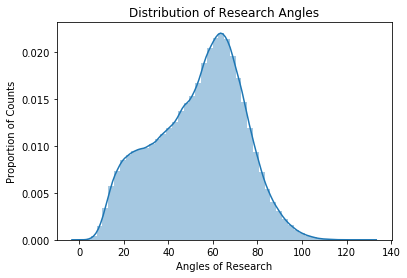

In [23]:
ax = sns.distplot(rrs)
ax.set(xlabel="Angles of Research", ylabel="Proportion of Counts", title="Distribution of Research Angles")
plt.show()

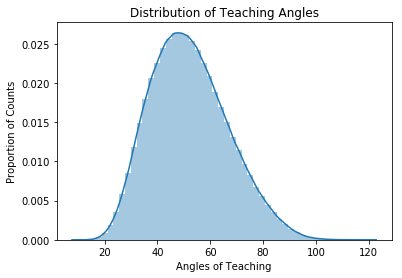

In [24]:
ax = sns.distplot(tts)
ax.set(xlabel="Angles of Teaching", ylabel="Proportion of Counts", title="Distribution of Teaching Angles")
plt.show()

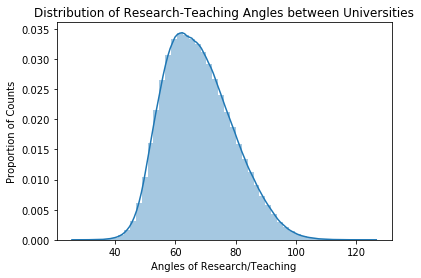

In [25]:
ax = sns.distplot(rt_between)
ax.set(xlabel="Angles of Research/Teaching", ylabel="Proportion of Counts", title="Distribution of Research-Teaching Angles between Universities")
plt.show()

### Cities



In [26]:
rrs_cities, tts_cities, jjs_cities = [], [], []

In [27]:
rt_between_cities, rt_within_cities, rj_between_cities, rj_within_cities, tj_between_cities, tj_within_cities = [], [], [], [], [], []

In [28]:
for city in city_angles_within:
    rt, rj, tj = eval(city_angles_within[city])
    if rt is not None:
        rt_within_cities.append(rt)
    if rj is not None:
        rj_within_cities.append(rj)
    if tj is not None:
        tj_within_cities.append(tj)

In [29]:
for city in city_angles_between:
    r1r2, t1r2, j1r2, r1t2, t1t2, j1t2, r1j2, t1j2, j1j2 = eval(city_angles_between[city])
    if r1r2 is not None:
        rrs_cities.append(r1r2)
    if t1r2 is not None:
        rt_between_cities.append(t1r2)
    if j1r2 is not None:
        rj_between_cities.append(j1r2)
    if r1t2 is not None:
        rt_between_cities.append(r1t2)
    if t1t2 is not None:
        tts_cities.append(t1t2)
    if j1t2 is not None:
        tj_between_cities.append(j1t2)
    if r1j2 is not None:
        rj_between_cities.append(r1j2)
    if t1j2 is not None:
        tj_between_cities.append(t1j2)
    if j1j2 is not None:
        jjs_cities.append(j1j2)

In [30]:
min(rrs_cities), max(rrs_cities)

(1.8437836809927666, 136.9583768774205)

In [31]:
len(rrs_cities), len(tts_cities)

(53268357, 1312213)

In [32]:
# np.corrcoef(rrs_cities, tts_cities)

In [33]:
 min(tts_cities), max(tts_cities)

(0.0, 119.72475578678619)

In [34]:
 min(jjs_cities), max(jjs_cities)

(0.0, 124.21006328502777)

In [35]:
 min(rt_within_cities), max(rt_within_cities)

(50.23105884778088, 97.92935871089563)

In [36]:
 min(rt_between_cities), max(rt_between_cities)

(26.89994844438095, 130.25782832777261)

In [37]:
 min(rj_within_cities), max(rj_within_cities)

(44.29188255188958, 117.19666172365775)

In [38]:
 min(rj_between_cities), max(rj_between_cities)

(28.094968304589482, 132.75520301386865)

In [39]:
def find_corr(vectors_0, vectors_1):
    vecs_0, vecs_1 = [], []
    for entity in vectors_0:
        if entity in vectors_1:
            vecs_0.append(vectors_0[entity][0])
            vecs_1.append(vectors_1[entity][0])
    return(np.corrcoef(vecs_0, vecs_1))

In [40]:
# orrs = find_corr(teaching_cities, job_cities)

In [41]:
# corrs[1]

In [42]:
np.mean(rt_between_cities), np.mean(rt_within_cities)

(71.37128227476973, 73.15304861362536)

In [43]:
 min(tj_within_cities), max(tj_within_cities)

(52.919979778356556, 108.29795406052334)

In [44]:
 min(tj_between_cities), max(tj_between_cities)

(25.341472506791348, 127.61510063597416)

In [45]:
avg_rr = np.mean(rrs_cities)
avg_tt = np.mean(tts_cities)
avg_jj = np.mean(jjs_cities)
avg_rt_within = np.mean(rt_within_cities)
avg_rt_between = np.mean(rt_between_cities)
avg_rj_within = np.mean(rj_within_cities)
avg_rj_between = np.mean(rj_between_cities)
avg_tj_within = np.mean(tj_within_cities)
avg_tj_between = np.mean(tj_between_cities)

In [46]:
avg_rr, avg_tt, avg_jj, avg_rt_within, avg_rt_between, avg_rj_within, avg_rj_between, avg_tj_within, avg_tj_between

(66.77106613164942,
 49.72483604716012,
 78.28370628291422,
 73.15304861362536,
 71.37128227476973,
 78.94480426635592,
 76.99285710204731,
 77.22721317538304,
 79.17201843000939)

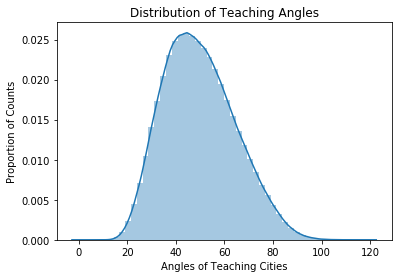

In [47]:
ax = sns.distplot(tts_cities)
ax.set(xlabel="Angles of Teaching Cities", ylabel="Proportion of Counts", title="Distribution of Teaching Angles")
plt.show()

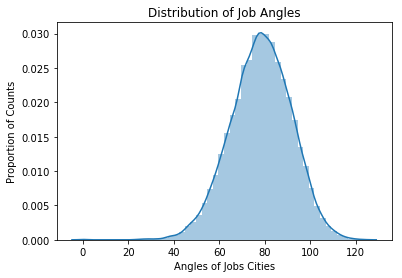

In [48]:
ax = sns.distplot(jjs_cities)
ax.set(xlabel="Angles of Jobs Cities", ylabel="Proportion of Counts", title="Distribution of Job Angles")
plt.show()

In [49]:
var_rr = np.var(rrs_cities)
var_tt = np.var(tts_cities)
var_jj = np.var(jjs_cities)
var_rt_within = np.var(rt_within_cities)
var_rt_between = np.var(rt_between_cities)
var_rj_within = np.var(rj_within_cities)
var_rj_between = np.var(rj_between_cities)
var_tj_within = np.var(tj_within_cities)
var_tj_between = np.var(tj_between_cities)

In [50]:
var_rr, var_tt, var_jj, var_rt_within, var_rt_between, var_rj_within, var_rj_between, var_tj_within, var_tj_between

(276.2772867049989,
 216.37291576696884,
 178.00710905831653,
 56.42456678396613,
 140.23110071110514,
 110.88576127503309,
 148.50357319947935,
 125.03178702950899,
 136.4019652250339)